In [125]:
# -*- coding: utf-8 -*-
"""
Created on Thu Apr  1 20:26:44 2021
@author: Thomas Butler, vra2cf
"""

'''
As covid cases increase and vaccinations increase, how does this effect covid case growth?
As covid cases increase and testing increases or decreases, how does this effect covid case growth?
change in covid cases week by week, "new_cases" y
change in testing week by week, "new_tests"
change in vaccination week by week, "Weekly Vaccines Given"
as change in vaccinations increase is there a decrease in change in covid case growth?
as change in testing increases/decreases is there a decrease/increase in change in covid case growth?
want to see a negative b1 on both regressions.
check to see if covid vaccines are effected x weeks down the line by viewing covid cases
'''
#%% packages
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import scipy.stats as stats
import unittest
import math
%matplotlib inline

In [126]:
#----
#%% data load in and test v cases regression
#----
#I am looking at the older version Cleaned Covid data csv that I ran right before our presentation as the most updated one changes some information in my model.
url = "https://raw.githubusercontent.com/Toble007/COVID-19_CS_5010_Project/main/Code/Cleaned%20COVID%20Data.csv"
df = pd.read_csv(url)

In [127]:
df["location"].unique()

array(['Algeria', 'Angola', 'Cape Verde', "Cote d'Ivoire", 'Egypt',
       'Equatorial Guinea', 'Gambia', 'Ghana', 'Kenya', 'Malawi',
       'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Nigeria',
       'Rwanda', 'Saint Helena', 'Sao Tome and Principe', 'Senegal',
       'Seychelles', 'Sierra Leone', 'South Africa', 'Togo', 'Tunisia',
       'Uganda', 'Zimbabwe', 'Afghanistan', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Cambodia', 'China', 'Georgia', 'Hong Kong', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan',
       'Kazakhstan', 'Kuwait', 'Lebanon', 'Macao', 'Malaysia', 'Maldives',
       'Mongolia', 'Myanmar', 'Nepal', 'Oman', 'Pakistan', 'Philippines',
       'Qatar', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka',
       'Taiwan', 'Thailand', 'Turkey', 'United Arab Emirates', 'Vietnam',
       'Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bulgaria',
       'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia',
       'Faeroe Isl

In [128]:
df.isna().sum()

continent                                                       0
location                                                        0
population                                                      0
population_density                                            101
median_age                                                    427
aged_65_older                                                 489
cardiovasc_death_rate                                         328
diabetes_prevalence                                           146
handwashing_facilities                                       4612
life_expectancy                                                17
human_development_index                                       284
Case Week                                                       0
new_tests                                                       0
new_cases                                                       0
new_deaths                                                      0
total_test

In [129]:
df["Count"] = 1
df[["Vaccine Week","Count"]].groupby(by=["Vaccine Week"]).sum()

,Count
Vaccine Week,
1.0,151
2.0,142
3.0,130
4.0,120
5.0,111
6.0,90
7.0,77
8.0,73
9.0,67


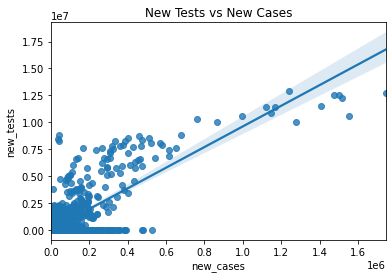

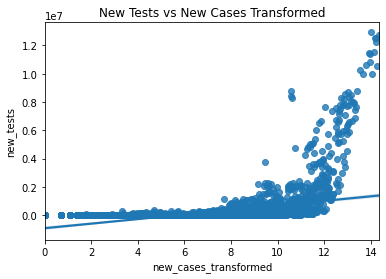

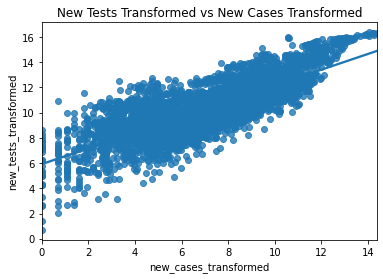

In [130]:
#remove any cases with < 0
df["not 0 case"] = True
for num in range(len(df)):
    if df["new_cases"][num] < 0:
        df.loc[num,'not 0 case'] = False
df = df[df["not 0 case"]]
df = df.reset_index(drop=True)

sns.regplot(x="new_cases",y="new_tests", data= df)
plt.title("New Tests vs New Cases")
plt.savefig('New Tests vs New Cases.png')
plt.show()
plt.close('all')

#remove any data point that has 0 new cases.
case = df.copy()
case["not 0 case"] = True
for num in range(len(case)):
    if case["new_cases"][num] == 0:
        case.loc[num,'not 0 case'] = False
case = case[case["not 0 case"]]
case = case.reset_index(drop=True)

#remove any data point that has <=0 new tests.
case["not 0 test"] = True
for num in range(len(case)):
    if case["new_tests"][num] <= 0:
        case.loc[num,'not 0 test'] = False
case = case[case["not 0 test"]]
case = case.reset_index(drop=True)

#transform new cases
case["new_cases_transformed"] = case["new_cases"].apply(lambda x: math.log(x))
#case["new_cases_transformed"] = stats.boxcox(case["new_cases"])[0]

sns.regplot(x="new_cases_transformed",y="new_tests", data= case)
plt.title("New Tests vs New Cases Transformed")
plt.savefig('New Tests vs New Cases Transformed.png')
plt.show()
plt.close('all')

#transform new_tests
case["new_tests_transformed"] = case["new_tests"].apply(lambda x: math.log(x))
#case["new_tests_transformed"] = stats.boxcox(case["new_tests"])[0]

sns.regplot(x="new_cases_transformed",y="new_tests_transformed", data= case)
plt.title("New Tests Transformed vs New Cases Transformed")
plt.savefig('New Tests Transformed vs New Cases Transformed.png')
plt.show()
plt.close('all')

                              OLS Regression Results                             
Dep. Variable:     new_tests_transformed   R-squared:                       0.632
Model:                               OLS   Adj. R-squared:                  0.632
Method:                    Least Squares   F-statistic:                     8400.
Date:                   Sat, 08 May 2021   Prob (F-statistic):               0.00
Time:                           17:44:06   Log-Likelihood:                -8022.7
No. Observations:                   4891   AIC:                         1.605e+04
Df Residuals:                       4889   BIC:                         1.606e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


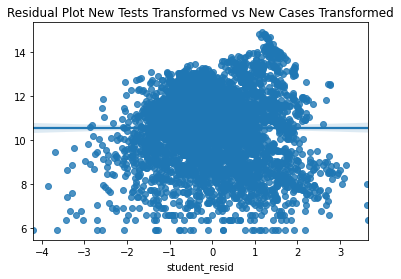

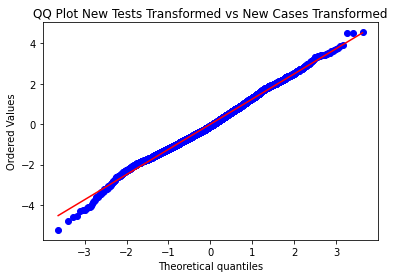

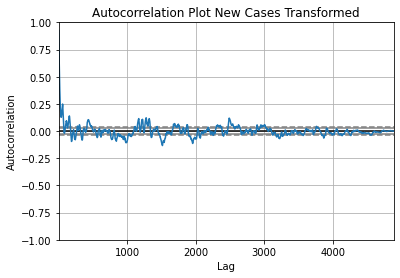

In [131]:
test = case[['new_cases_transformed','new_tests_transformed']]
x = test['new_cases_transformed']
x = sm.add_constant(x)
y = test['new_tests_transformed']
reduced = sm.OLS(y,x).fit()
print(reduced.summary())

#residual plot
r_student = reduced.outlier_test()["student_resid"]
sns.regplot(x=r_student,y=reduced.fittedvalues)
plt.title("Residual Plot New Tests Transformed vs New Cases Transformed")
plt.savefig('Residual Plot New Tests Transformed vs New Cases Transformed.png')
plt.show()
plt.close('all')

#qq plot
fig, ax = plt.subplots()
_, (__, ___, r) = stats.probplot(reduced.resid, plot=ax, fit=True)
plt.title("QQ Plot New Tests Transformed vs New Cases Transformed")
plt.savefig('QQ Plot New Tests Transformed vs New Cases Transformed.png')
plt.show()
plt.close('all')

#autocorrelation plot
x = pd.plotting.autocorrelation_plot(case["new_cases_transformed"])
plt.title("Autocorrelation Plot New Cases Transformed")
# ploting the Curve
x.plot()
plt.savefig('Autocorrelation Plot New Cases Transformed.png')
# Display
plt.show()
plt.close('all')
#https://www.geeksforgeeks.org/python-pandas-plotting-the-autocorrelation-plot/

#ok have a increasing variance and a non-zero mean. I don't know how to fix both of these. 
#I would guess I am missing predictors but I am not sure which those are.

In [132]:
#----
#%% Vaccine v cases regression
#----
print(len(df))
df = df[-df['Vaccine Week'].isna()]
df = df.reset_index(drop=True)
print(len(df))
df.isna().sum()

7699
1159


continent                                                      0
location                                                       0
population                                                     0
population_density                                            40
median_age                                                   144
aged_65_older                                                145
cardiovasc_death_rate                                        128
diabetes_prevalence                                           85
handwashing_facilities                                       887
life_expectancy                                               17
human_development_index                                      128
Case Week                                                      0
new_tests                                                      0
new_cases                                                      0
new_deaths                                                     0
total_tests              

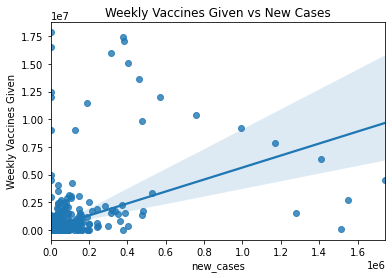

                              OLS Regression Results                             
Dep. Variable:     Weekly Vaccines Given   R-squared:                       0.168
Model:                               OLS   Adj. R-squared:                  0.167
Method:                    Least Squares   F-statistic:                     233.3
Date:                   Sat, 08 May 2021   Prob (F-statistic):           4.09e-48
Time:                           17:44:17   Log-Likelihood:                -18137.
No. Observations:                   1159   AIC:                         3.628e+04
Df Residuals:                       1157   BIC:                         3.629e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.178e+05 

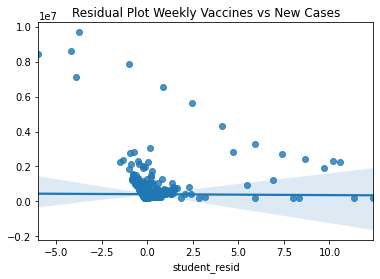

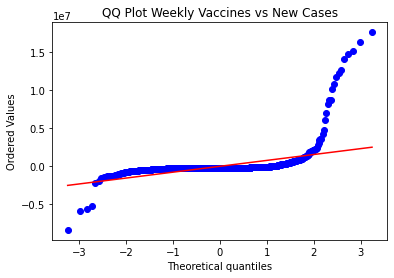

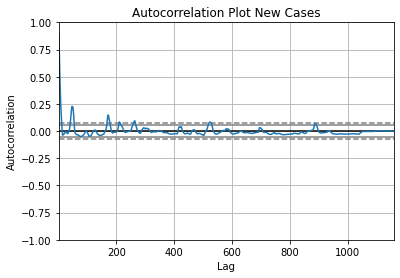

In [133]:
sns.regplot(y="Weekly Vaccines Given",x="new_cases", data= df)
plt.title("Weekly Vaccines Given vs New Cases")
plt.savefig('Weekly Vaccines Given vs New Cases.png')
plt.show()
plt.close('all')

test = df[['new_cases','Weekly Vaccines Given']]
x = test['new_cases']
x = sm.add_constant(x)
y = test['Weekly Vaccines Given']
reduced = sm.OLS(y,x).fit()
print(reduced.summary())

#residual plot
r_student = reduced.outlier_test()["student_resid"]
sns.regplot(x=r_student,y=reduced.fittedvalues)
plt.title("Residual Plot Weekly Vaccines vs New Cases")
plt.savefig('Residual Plot Weekly Vaccines vs New Cases.png')
plt.show()
plt.close('all')

#qq plot
fig, ax = plt.subplots()
_, (__, ___, r) = stats.probplot(reduced.resid, plot=ax, fit=True)
plt.title("QQ Plot Weekly Vaccines vs New Cases")
plt.savefig('QQ Plot Weekly Vaccines vs New Cases.png')
plt.show()
plt.close('all')

#autocorrelation plot
x = pd.plotting.autocorrelation_plot(df["new_cases"])
plt.title("Autocorrelation Plot New Cases")
# ploting the Curve
x.plot()
plt.savefig('Autocorrelation Plot New Cases.png')
# Display
plt.show()
plt.close('all')

In [134]:
#remove any country that doesn't have covid cases but are vaccinating anyways.
df["not 0 cases"] = True
count = 0
for num in range(len(df)):
    if num == len(df)-1:
        if df["total_cases"][num] == 0:
            for x in range(count+1):
                df.loc[num-x-1,'not 0 cases'] = False
    elif df['location'][num+1] == df['location'][num]:
        count += 1
    else:
        if df["total_cases"][num] == 0:
            for x in range(count+1):
                df.loc[num-x,'not 0 cases'] = False
        count = 0

df = df[df["not 0 cases"]]
df = df.reset_index(drop=True)

print(len(df))

#remove all datapoints that have either 0 new cases and/or 0 Weekly Vaccines Given
df["not 0 new cases or Weekly Vaccines Given"] = True
for num in range(len(df)):
    if df["new_cases"][num] <= 0:
        df.loc[num,'not 0 new cases or Weekly Vaccines Given'] = False
    elif df["Weekly Vaccines Given"][num] <= 0:
        df.loc[num,'not 0 new cases or Weekly Vaccines Given'] = False
df = df[df["not 0 new cases or Weekly Vaccines Given"]]
df = df.reset_index(drop=True)

print(len(df))

#checking which countries have at least 3 weeks of vaccine data
df['At least 3 weeks of vaccine data'] = False
for num in range(len(df)):
    if num == 0:
        count = 0
        vac_count = 0
    elif df['location'][num] == df['location'][num-1]:
        count += 1
        if df["Weekly Vaccines Given"][num] != 0:
            vac_count += 1
    else:
        if vac_count >= 3:
            for x in range(count+1):
                df.loc[num-x-1,'At least 3 weeks of vaccine data'] = True
        count = 0
        vac_count = 0

#removing any country that doesn't have 3 weeks of vaccine data.
df = df[df["At least 3 weeks of vaccine data"]]
df = df.reset_index(drop=True)

df = df.rename(columns={"Weekly Vaccines Given": "Weekly_Vaccines_Given"})

print(len(df))


1042
849
778


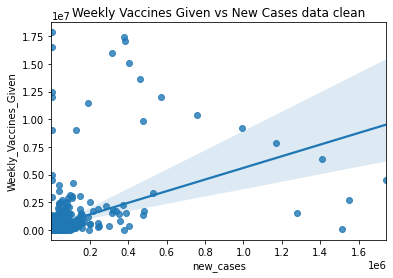

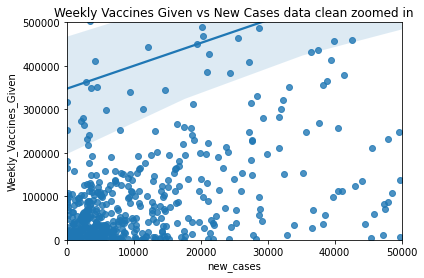

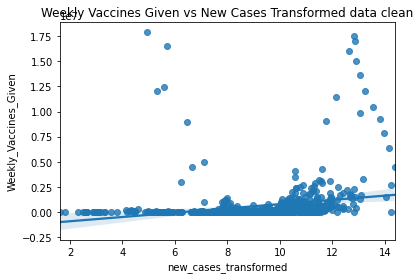

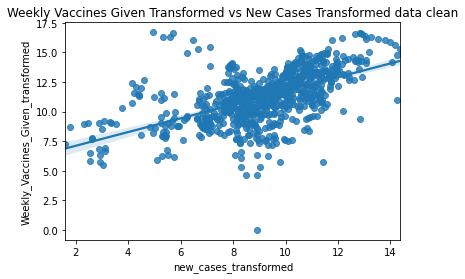

                                    OLS Regression Results                                   
Dep. Variable:     Weekly_Vaccines_Given_transformed   R-squared:                       0.308
Model:                                           OLS   Adj. R-squared:                  0.307
Method:                                Least Squares   F-statistic:                     345.3
Date:                               Sat, 08 May 2021   Prob (F-statistic):           4.92e-64
Time:                                       17:44:21   Log-Likelihood:                -1579.9
No. Observations:                                778   AIC:                             3164.
Df Residuals:                                    776   BIC:                             3173.
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
                            coef    std err          t      

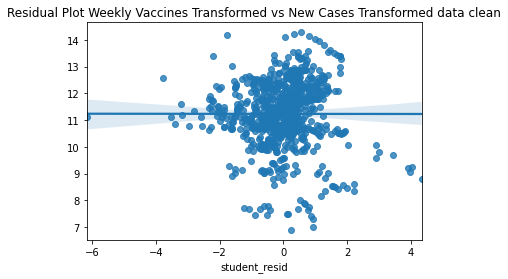

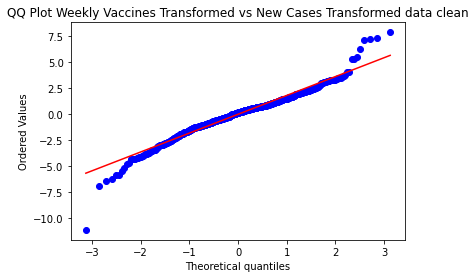

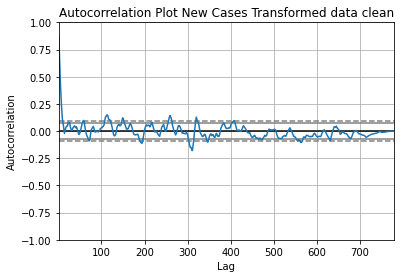

In [135]:
#regraph to see if anything else should be changed.
sns.regplot(y="Weekly_Vaccines_Given",x="new_cases", data= df)
plt.title("Weekly Vaccines Given vs New Cases data clean")
plt.savefig('Weekly Vaccines Given vs New Cases data clean.png')
plt.show()
plt.close('all')

#zoom in a bit
ax = sns.regplot(y="Weekly_Vaccines_Given",x="new_cases", data= df)
plt.title("Weekly Vaccines Given vs New Cases data clean zoomed in")
ax.set(ylim=(0, 500000), xlim=(0, 50000))
plt.savefig('Weekly Vaccines Given vs New Cases data clean zoomed in.png')
plt.show(ax)
plt.close('all')
#so either I need a transformation and/or influential point removal from this.
#lets try transforming
df["new_cases_transformed"] = df["new_cases"].apply(lambda x: math.log(x))
'''
box = stats.boxcox(df["new_cases"])[0]
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html
df['new_cases_transformed']=pd.Series(box)
#https://stackoverflow.com/questions/44424594/converting-numpy-array-into-dataframe-column
'''

sns.regplot(y="Weekly_Vaccines_Given",x="new_cases_transformed", data= df)
plt.title("Weekly Vaccines Given vs New Cases Transformed data clean")
plt.savefig('Weekly Vaccines Given vs New Cases Transformed data clean.png')
plt.show()
plt.close('all')

df["Weekly_Vaccines_Given_transformed"] = df["Weekly_Vaccines_Given"].apply(lambda x: math.log(x))
'''
box = stats.boxcox(df["Weekly_Vaccines_Given"])[0]
df['Weekly_Vaccines_Given_transformed']=pd.Series(box)
'''

sns.regplot(y="Weekly_Vaccines_Given_transformed",x="new_cases_transformed", data= df)
plt.title("Weekly Vaccines Given Transformed vs New Cases Transformed data clean")
plt.savefig('Weekly Vaccines Given Transformed vs New Cases Transformed data clean.png')
plt.show()
plt.close('all')

#fit a model
test = df[['new_cases_transformed','Weekly_Vaccines_Given_transformed']]
x = test['new_cases_transformed']
x = sm.add_constant(x)
y = test['Weekly_Vaccines_Given_transformed']
reduced = sm.OLS(y,x).fit()
print(reduced.summary())

#residual plot
r_student = reduced.outlier_test()["student_resid"]
sns.regplot(x=r_student,y=reduced.fittedvalues)
plt.title("Residual Plot Weekly Vaccines Transformed vs New Cases Transformed data clean")
plt.savefig('Residual Plot Weekly Vaccines Transformed vs New Cases Transformed data clean.png')
plt.show()
plt.close('all')

#qq plot
fig, ax = plt.subplots()
_, (__, ___, r) = stats.probplot(reduced.resid, plot=ax, fit=True)
plt.title("QQ Plot Weekly Vaccines Transformed vs New Cases Transformed data clean")
plt.savefig('QQ Plot Weekly Vaccines Transformed vs New Cases Transformed data clean.png')
plt.show()
plt.close('all')

#autocorrelation plot
x = pd.plotting.autocorrelation_plot(df["new_cases_transformed"])
plt.title("Autocorrelation Plot New Cases Transformed data clean")
# ploting the Curve
x.plot()
plt.savefig('Autocorrelation Plot New Cases Transformed data clean.png')
# Display
plt.show()
plt.close('all')

In [136]:
#ok looks like the log transformations solved the problem, but created a problem with a non-zero mean this might be fixed by putting in more regressors. 
#It also still looks like i have 1 to a few influential points lets look at that after we have the full model.

#check to see if covid vaccines are effected x weeks down the line by viewing covid cases
df["Week_1"] = 0
df["Week_2"] = 0
df["Week_3"] = 0
df["Week_4"] = 0
df["Week_5"] = 0
df["Week_6"] = 0
df["Week_7"] = 0
df["Week_8"] = 0
df["Week_9"] = 0

for num in range(len(df)):
    count = 0
    if df["new_cases_transformed"][num] != 0:
        while df["location"][num] == df["location"][num+count]:
            count +=1
            if num + count == len(df):
                break
    if count != 0:
        count -=1
        if count >= 1:
            df.loc[num+1,"Week_1"] = df.loc[num,"new_cases_transformed"]
        if count >= 2:
            df.loc[num+2,"Week_2"] = df.loc[num,"new_cases_transformed"]
        if count >= 3:
            df.loc[num+3,"Week_3"] = df.loc[num,"new_cases_transformed"]
        if count >= 4:
            df.loc[num+4,"Week_4"] = df.loc[num,"new_cases_transformed"]
        if count >= 5:
            df.loc[num+5,"Week_5"] = df.loc[num,"new_cases_transformed"]
        if count >= 6:
            df.loc[num+6,"Week_6"] = df.loc[num,"new_cases_transformed"]
        if count >= 7:
            df.loc[num+7,"Week_7"] = df.loc[num,"new_cases_transformed"]
        if count >= 8:
            df.loc[num+8,"Week_8"] = df.loc[num,"new_cases_transformed"]
        if count >= 9:
            df.loc[num+9,"Week_9"] = df.loc[num,"new_cases_transformed"]


test = df[['new_cases_transformed','Weekly_Vaccines_Given_transformed',"Week_1","Week_2","Week_3","Week_4","Week_5","Week_6","Week_7","Week_8","Week_9"]]
x = test[test.columns[~test.columns.isin(["Weekly_Vaccines_Given_transformed"])]]
x = sm.add_constant(x)
y = test['Weekly_Vaccines_Given_transformed']
result = sm.OLS(y,x).fit()
print(result.summary())

#anova to compare models
anovaResults = anova_lm(reduced, result)
#https://stackoverflow.com/questions/45243802/how-do-i-do-an-f-test-to-compare-nested-linear-models-in-python
print(anovaResults)
#We can see that according to the ANOVA output at least 1 of the weekly terms are significant.

                                    OLS Regression Results                                   
Dep. Variable:     Weekly_Vaccines_Given_transformed   R-squared:                       0.474
Model:                                           OLS   Adj. R-squared:                  0.468
Method:                                Least Squares   F-statistic:                     69.23
Date:                               Sat, 08 May 2021   Prob (F-statistic):          3.47e-100
Time:                                       17:44:25   Log-Likelihood:                -1472.9
No. Observations:                                778   AIC:                             2968.
Df Residuals:                                    767   BIC:                             3019.
Df Model:                                         10                                         
Covariance Type:                           nonrobust                                         
                            coef    std err          t      

In [137]:
test = df[['new_cases_transformed','Weekly_Vaccines_Given_transformed',"Week_1","Week_3","Week_6"]]
x = test[test.columns[~test.columns.isin(["Weekly_Vaccines_Given_transformed"])]]
x = sm.add_constant(x)
y = test['Weekly_Vaccines_Given_transformed']
reduced = sm.OLS(y,x).fit()
print(reduced.summary())

anovaResults = anova_lm(reduced, result)
print(anovaResults)
#keep reduced model.

                                    OLS Regression Results                                   
Dep. Variable:     Weekly_Vaccines_Given_transformed   R-squared:                       0.466
Model:                                           OLS   Adj. R-squared:                  0.463
Method:                                Least Squares   F-statistic:                     168.6
Date:                               Sat, 08 May 2021   Prob (F-statistic):          9.72e-104
Time:                                       17:44:25   Log-Likelihood:                -1479.2
No. Observations:                                778   AIC:                             2968.
Df Residuals:                                    773   BIC:                             2992.
Df Model:                                          4                                         
Covariance Type:                           nonrobust                                         
                            coef    std err          t      

In [138]:
test = df[['new_cases_transformed','Weekly_Vaccines_Given_transformed',"Week_1","Week_3","Week_6"]]
result = smf.ols(formula="Weekly_Vaccines_Given_transformed~new_cases_transformed*Week_1+new_cases_transformed*Week_3+new_cases_transformed*Week_6",data=test).fit()
print(result.summary())

anovaResults = anova_lm(reduced, result)
print(anovaResults)
#At least 1 of the weekly interactive terms are significant.

                                    OLS Regression Results                                   
Dep. Variable:     Weekly_Vaccines_Given_transformed   R-squared:                       0.485
Model:                                           OLS   Adj. R-squared:                  0.480
Method:                                Least Squares   F-statistic:                     103.4
Date:                               Sat, 08 May 2021   Prob (F-statistic):          2.18e-106
Time:                                       17:44:25   Log-Likelihood:                -1465.3
No. Observations:                                778   AIC:                             2947.
Df Residuals:                                    770   BIC:                             2984.
Df Model:                                          7                                         
Covariance Type:                           nonrobust                                         
                                   coef    std err          

                                    OLS Regression Results                                   
Dep. Variable:     Weekly_Vaccines_Given_transformed   R-squared:                       0.484
Model:                                           OLS   Adj. R-squared:                  0.481
Method:                                Least Squares   F-statistic:                     144.9
Date:                               Sat, 08 May 2021   Prob (F-statistic):          2.08e-108
Time:                                       17:44:25   Log-Likelihood:                -1465.6
No. Observations:                                778   AIC:                             2943.
Df Residuals:                                    772   BIC:                             2971.
Df Model:                                          5                                         
Covariance Type:                           nonrobust                                         
                                   coef    std err          

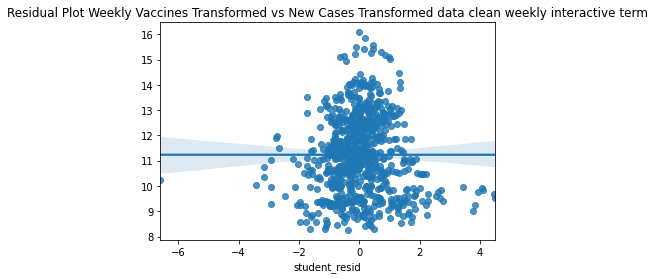

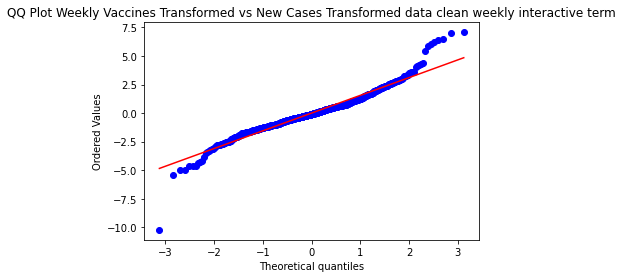

In [139]:
test = df[['new_cases_transformed','Weekly_Vaccines_Given_transformed',"Week_1","Week_3","Week_6"]]
reduced = smf.ols(formula="Weekly_Vaccines_Given_transformed~new_cases_transformed*Week_1+Week_3+Week_6",data=test).fit()
print(reduced.summary())

anovaResults = anova_lm(reduced, result)
print(anovaResults)
# keep reduced model

#residual plot
r_student = reduced.outlier_test()["student_resid"]
sns.regplot(x=r_student,y=reduced.fittedvalues)
plt.title("Residual Plot Weekly Vaccines Transformed vs New Cases Transformed data clean weekly interactive term")
plt.savefig('Residual Plot Weekly Vaccines Transformed vs New Cases Transformed data clean weekly interactive term.png')
plt.show()
plt.close('all')

#qq plot
fig, ax = plt.subplots()
_, (__, ___, r) = stats.probplot(reduced.resid, plot=ax, fit=True)
plt.title("QQ Plot Weekly Vaccines Transformed vs New Cases Transformed data clean weekly interactive term")
plt.savefig('QQ Plot Weekly Vaccines Transformed vs New Cases Transformed data clean weekly interactive term.png')
plt.show()
plt.close('all')

In [142]:
# ----
#%% testing
# ----
class df_testcase(unittest.TestCase):
    
    def test_no_na_in_important_columns(self):
        #check to make sure no na's are in used columns
        for name in ['continent','location','Case Week','new_tests','new_cases','new_deaths',
                     'total_tests','total_cases','total_deaths','Vaccine Week','Weekly_Vaccines_Given']:
            for bol in df[name].isna():
                self.assertTrue(bol == False)
        
    def test_Week_1_to_9_calculating_correctly(self):
        #test Week 1-9 to make sure calculation is correct, checking 1 country, Seychelles.
        lis = df["Weekly_Vaccines_Given_transformed"][20:29].values.tolist()
        count = 0
        for num in range(10,0,-1):
            count += 1
            if count == 1:
                self.assertTrue(lis[0:num], df["Week_1"][4+count:12].values.tolist())
            elif count == 2:
                self.assertTrue(lis[0:num], df["Week_2"][4+count:12].values.tolist())
            elif count == 3:
                self.assertTrue(lis[0:num], df["Week_3"][4+count:12].values.tolist())
            elif count == 4:
                self.assertTrue(lis[0:num], df["Week_4"][4+count:12].values.tolist())
            elif count == 5:
                self.assertTrue(lis[0:num], df["Week_5"][4+count:12].values.tolist())
            elif count == 6:
                self.assertTrue(lis[0:num], df["Week_6"][4+count:12].values.tolist())
            elif count == 7:
                self.assertTrue(lis[0:num], df["Week_7"][4+count:12].values.tolist())
            elif count == 8:
                self.assertTrue(lis[0:num], df["Week_8"][4+count:12].values.tolist())
            elif count == 9:
                self.assertTrue(lis[0:num], df["Week_9"][4+count:12].values.tolist())
                
    def test_not_0_cases_is_calculated_correctly(self):
        #check that 'not 0 cases' is calculated correctly
        for case in df[['location','total_cases']].groupby(by=["location"]).max()['total_cases']:
            self.assertNotEqual(case, 0)
        
    def test_At_least_3_weeks_of_vaccine_data_is_True(self):
        #check that there are at least 3 weeks of vaccine data
        for x in df[['location','Weekly_Vaccines_Given']].groupby(by=["location"]):
            count = 0
            for val in x[1]["Weekly_Vaccines_Given"]:
                if val != 0:
                    count += 1
                    if count >= 3:
                        break
            self.assertTrue(count >= 3, msg = x[0])
    
    def test_all_positive_values_in_relevant_columns(self):
        #make sure df["Weekly_Vaccines_Given"], df["new_cases"], case["new_tests"], case["new_cases"] all have <0 values.
        for x in df["Weekly_Vaccines_Given"]:
            self.assertTrue(x > 0)
        for x in df["new_cases"]:
            self.assertTrue(x > 0)
        for x in case["new_tests"]:
            self.assertTrue(x > 0)
        for x in case["new_cases"]:
            self.assertTrue(x > 0)

unittest.main(argv=[''],exit=False)
#if __name__ == '__main__':
#    unittest.main()


.....
----------------------------------------------------------------------
Ran 5 tests in 0.038s

OK
